#### 강남구 입지 Feature Extraction & Clustering 코드 2
##### 사용 데이터 : 유동인구비율, "문화·체육·휴양시설, 상업지역, 주거지역" 의 행정동 면적 대비 비율
##### 1. 일 평균 생활 인구 / 주거 인구 비율 -> 상업지구인지, 주거지역인지 알기 위함

In [1]:
import pandas as pd
## Load Data
# 주거 인구 데이터 Load
live_people = pd.read_excel("../../resources/rawdata/201902_인구 및 세대현황(전체).xlsx")
# 불필요한 컬럼 삭제
live_people = live_people.iloc[:,:6]

# 활동 인구수 데이터 Load
active_people = pd.read_excel("../../resources/extractedData/강남구 행정동별 활동인구 평균.xlsx")

# 토지 피복 비율 데이터 Load
landscape = pd.read_csv("../../resources/extractedData/classification of land cover based on total area (divided 3 categories).csv", encoding="utf8")

In [2]:
# 데이터 확인 - 행정동 데이터 에러 해결
live_people["행정동"] = live_people["행정동"].str.replace(" ","")

In [3]:
live_people

,행정동,계,남,여,지역,남자비율
0,신사동,17541,8158,9383,3.234312,1.504220
1,논현1동,23452,10849,12603,4.324217,2.000402
2,논현2동,21960,10289,11671,4.049113,1.897146
3,압구정동,27953,12878,15075,5.154137,2.374521
4,청담동,30014,14128,15886,5.534157,2.605003
5,삼성1동,14811,7389,7422,2.730939,1.362427
6,삼성2동,30291,14411,15880,5.585231,2.657184
7,대치1동,25413,12737,12676,4.685797,2.348522
8,대치2동,39537,20066,19471,7.290063,3.699886
9,대치4동,20773,9806,10967,3.830247,1.808088


In [4]:
active_people

,행정동,주중평균활동인구,주말평균활동인구,일평균활동인구
0,신사동,38938.86,34017.55,37480.70
1,논현1동,45948.54,38033.38,43603.31
2,논현2동,47635.09,35376.66,44002.96
3,삼성1동,48142.06,36636.06,44732.87
4,삼성2동,42054.86,31835.21,39026.81
5,대치1동,26184.46,25688.00,26037.36
6,대치4동,34691.24,31401.05,33716.37
7,역삼1동,119213.17,82748.01,108408.68
8,역삼2동,53135.33,42006.91,49838.02
9,도곡1동,28094.82,24927.20,27156.26


In [5]:
landscape

,구분,주거지역,문화·체육·휴양시설,상업지역
0,개포1동,0.070271,0.004533,0.055238
1,개포2동,0.057580,0.015575,0.015922
2,개포4동,0.098809,0.007023,0.083572
3,논현1동,0.269607,0.007672,0.266056
4,논현2동,0.199901,0.006103,0.279204
5,대치1동,0.118022,0.025234,0.052061
6,대치2동,0.111103,0.013404,0.128700
7,대치4동,0.267188,0.001615,0.281517
8,도곡1동,0.126656,0.005894,0.119448
9,도곡2동,0.104076,0.014051,0.121235


In [7]:
## 1. 일 평균 생활 인구 / 주거 인구 비율 -> 상업지구인지, 주거지역인지 알기 위함
geofeature = pd.DataFrame(columns=["행정동","유동인구비율","문화·체육·휴양시설","상업지역","주거지역"])

# 행정동별 주중, 주말 평균 생활 인구수
for name in list(landscape["구분"]):
    lp = live_people[live_people["행정동"] == name]["계"].values[0]
    ap= active_people[active_people["행정동"] == name]["일평균활동인구"].values[0]
    ls1 = landscape[landscape["구분"] == name]["문화·체육·휴양시설"].values[0]
    ls2 = landscape[landscape["구분"] == name]["상업지역"].values[0]
    ls3 = landscape[landscape["구분"] == name]["주거지역"].values[0]
    
    ratio = round(ap/lp, 2)
    geofeature = geofeature.append({"행정동":name, "유동인구비율":ratio,"문화·체육·휴양시설": ls1, 
                                     "상업지역":ls2,"주거지역": ls3},ignore_index=True)

# 유동인구 min-max normalization
# geofeature["유동인구비율(0-1)"] = (geofeature["유동인구비율"] - min(geofeature["유동인구비율"])) / (max(geofeature["유동인구비율"]) - min(geofeature["유동인구비율"]))

In [8]:
geofeature

,행정동,유동인구비율,문화·체육·휴양시설,상업지역,주거지역
0,개포1동,0.87,0.004533,0.055238,0.070271
1,개포2동,1.07,0.015575,0.015922,0.057580
2,개포4동,0.90,0.007023,0.083572,0.098809
3,논현1동,1.86,0.007672,0.266056,0.269607
4,논현2동,2.00,0.006103,0.279204,0.199901
5,대치1동,1.02,0.025234,0.052061,0.118022
6,대치2동,1.40,0.013404,0.128700,0.111103
7,대치4동,1.62,0.001615,0.281517,0.267188
8,도곡1동,1.20,0.005894,0.119448,0.126656
9,도곡2동,0.84,0.014051,0.121235,0.104076


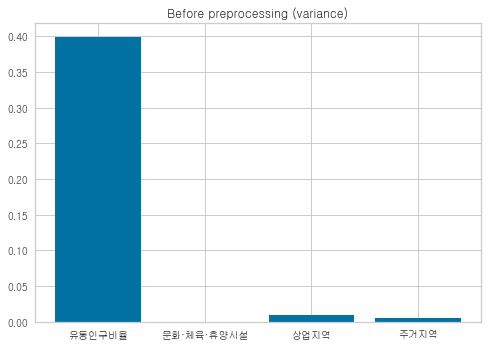

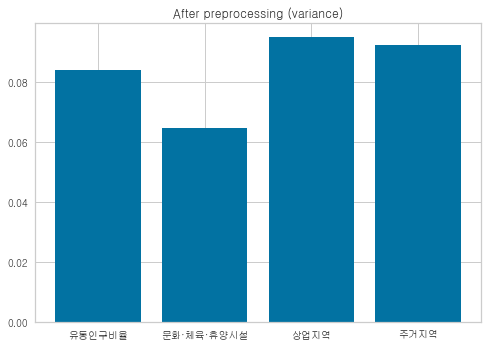

In [16]:
# 분산량 확인
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

x = geofeature.columns[1:]
y = [geofeature["유동인구비율"].var(), geofeature["문화·체육·휴양시설"].var(),geofeature["상업지역"].var(),geofeature["주거지역"].var()]
plt.bar(x,y)
plt.title("Before preprocessing (variance)")
plt.show()

# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리 
y = geofeature.iloc[:,1:].values

y = MinMaxScaler().fit_transform(y) # x객체에 x를 표준화한 데이터를 저장
y_t_df = pd.DataFrame(y, columns=["유동인구비율","문화·체육·휴양시설","상업지역","주거지역"])
y_t = [y_t_df["유동인구비율"].var(), y_t_df["문화·체육·휴양시설"].var(),y_t_df["상업지역"].var(),y_t_df["주거지역"].var()]
plt.bar(x, y_t)
plt.title("After preprocessing (variance)")
plt.show()

In [17]:
# 기존 4 Feature 
x_t_df = pd.concat([geofeature["행정동"],y_t_df], axis=1)
x_t_df

,행정동,유동인구비율,문화·체육·휴양시설,상업지역,주거지역
0,개포1동,0.013761,0.103343,0.134618,0.127287
1,개포2동,0.105505,0.494520,0.006028,0.071726
2,개포4동,0.027523,0.191573,0.227287,0.252231
3,논현1동,0.467890,0.214541,0.824126,1.000000
4,논현2동,0.532110,0.158974,0.867127,0.694820
5,대치1동,0.082569,0.836660,0.124224,0.336346
6,대치2동,0.256881,0.417589,0.374883,0.306054
7,대치4동,0.357798,0.000000,0.874694,0.989413
8,도곡1동,0.165138,0.151558,0.344625,0.374149
9,도곡2동,0.000000,0.440511,0.350468,0.275292


In [20]:
# 뽑힌 Feature로 clustering 진행 -  4 feature, 3 cluster
from sklearn.cluster import KMeans

k = 2
data = x_t_df.iloc[:,1:]

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(data)

# 결과 저장
x_t_df["cluster v1"] = model.fit_predict(data)

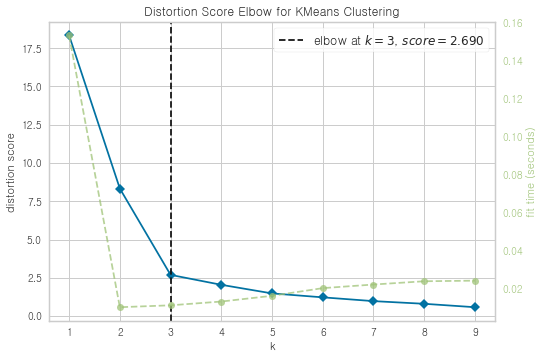

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from yellowbrick.cluster import KElbowVisualizer
# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data)
visualizer.show()

In [22]:
# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(x_t_df["cluster v1"]))


print(x_t_df[x_t_df["cluster v1"] == 0]["행정동"].values)
print(x_t_df[x_t_df["cluster v1"] == 1]["행정동"].values)
print(x_t_df[x_t_df["cluster v1"] == 2]["행정동"].values)
x_t_df


Counter({0: 18, 1: 4})
['개포1동' '개포2동' '개포4동' '대치1동' '대치2동' '도곡1동' '도곡2동' '삼성1동' '삼성2동' '세곡동'
 '수서동' '신사동' '압구정동' '역삼2동' '일원1동' '일원2동' '일원본동' '청담동']
['논현1동' '논현2동' '대치4동' '역삼1동']
[]


,행정동,유동인구비율,문화·체육·휴양시설,상업지역,주거지역,cluster v1
0,개포1동,0.013761,0.103343,0.134618,0.127287,0
1,개포2동,0.105505,0.494520,0.006028,0.071726,0
2,개포4동,0.027523,0.191573,0.227287,0.252231,0
3,논현1동,0.467890,0.214541,0.824126,1.000000,1
4,논현2동,0.532110,0.158974,0.867127,0.694820,1
5,대치1동,0.082569,0.836660,0.124224,0.336346,0
6,대치2동,0.256881,0.417589,0.374883,0.306054,0
7,대치4동,0.357798,0.000000,0.874694,0.989413,1
8,도곡1동,0.165138,0.151558,0.344625,0.374149,0
9,도곡2동,0.000000,0.440511,0.350468,0.275292,0
